# Quality evaluation synthetic data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

In [2]:
module_path = os.path.abspath(os.path.join('../../evaluation_metrics'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Load data

In [3]:
# Static data frames
original_static = pd.read_pickle('../../../../Master Thesis/data/preprocessed/tumours_patients_2017_train.pickle').set_index('eid').astype(str)
PBSeps1_static = pd.read_pickle('./synthetic_data/PBS_eps1_Full_tumours.pickle').astype(str)
PBSeps01_static = pd.read_pickle('./synthetic_data/PBS_eps01_Full_tumours.pickle').astype(str)

In [4]:
# Treatments data frames
original_treatments = pd.read_pickle('../../../../Master Thesis/data/preprocessed/treatments_2017_train.pickle')
PBSeps1_treatments = pd.read_pickle('./synthetic_data/PBS_eps1_Full_treatments.pickle')
PBSeps01_treatments = pd.read_pickle('./synthetic_data/PBS_eps01_Full_treatments.pickle')

In [5]:
# Test data
original_test_static = pd.read_pickle('../../../../Master Thesis/data/preprocessed/tumours_patients_2017_test.pickle').set_index('eid').astype(str)
original_test_treatments = pd.read_pickle('../../../../Master Thesis/data/preprocessed/treatments_2017_test.pickle')

In [6]:
# th_gebeurtenis -> translation to main groups
th_gebeurtenis = pd.read_csv('../../../../Master Thesis/data/thesauri/th_gebeurtenis.csv', engine='python')

def _change_stoma_hoofdgroep(row):
    if 'stoma' in row['omschrijving'].lower():
        return 'STOMA'
    else:
        return row['hoofdgroep_code']

# Create maingroup dict 
th_gebeurtenis['hoofdgroep_code'] = th_gebeurtenis.apply(lambda row: _change_stoma_hoofdgroep(row), axis=1)
maingroup_dict = dict(zip(th_gebeurtenis['code'], th_gebeurtenis['hoofdgroep_code']))

In [7]:
synth_static = {
    'PBS ' + r'$\varepsilon=1$': PBSeps1_static, 
    'PBS ' + r'$\varepsilon=0.1$': PBSeps01_static, 
}

synth_treatments = {
    'PBS ' + r'$\varepsilon=1$': PBSeps1_treatments, 
    'PBS ' + r'$\varepsilon=0.1$': PBSeps01_treatments, 
}

In [8]:
feature_rename_dict = {'tum_topo_code': 'Topology code',
                       'pat_geslacht_code': 'Gender',
                       'tum_differentiatiegraad_code': 'Differentiation grade',
                       'tum_lymfklieren_positief_atl': 'Nr positive lymph nodes', 
                       'age_at_diagnosis': 'Age at diagnosis',
                       'tum_topo_sublokalisatie_code': 'Sublocation',
                       'stadium': 'Stage',
                       'survival_1': '1 year survival',
                       'gbs_gebeurtenis_code': 'Sequence length'}

## QualityEvaluator

In [9]:
from evaluator import QualityEvaluator

In [10]:
qe = QualityEvaluator(original_static, original_treatments, original_test_static, original_test_treatments,
                      maingroup_dict, synth_static, synth_treatments, feature_rename_dict=feature_rename_dict)

### Metric 1: Patient covariates

{'PBS $\\varepsilon=1$': 0.012229759134360592,
 'PBS $\\varepsilon=0.1$': 0.039823260908803344}

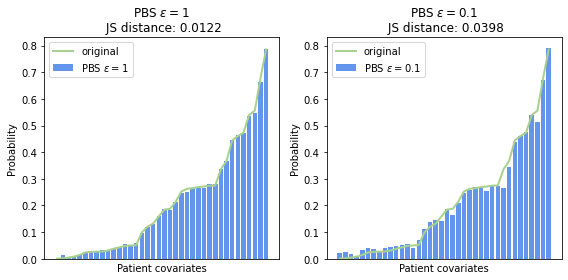

In [11]:
qe.m1_JSdistance_covariates(visual=True)

### Metric 2: RMSE treatment occurrence percentages

{'PBS $\\varepsilon=1$': 0.022227985484894144,
 'PBS $\\varepsilon=0.1$': 0.02658799080882272}

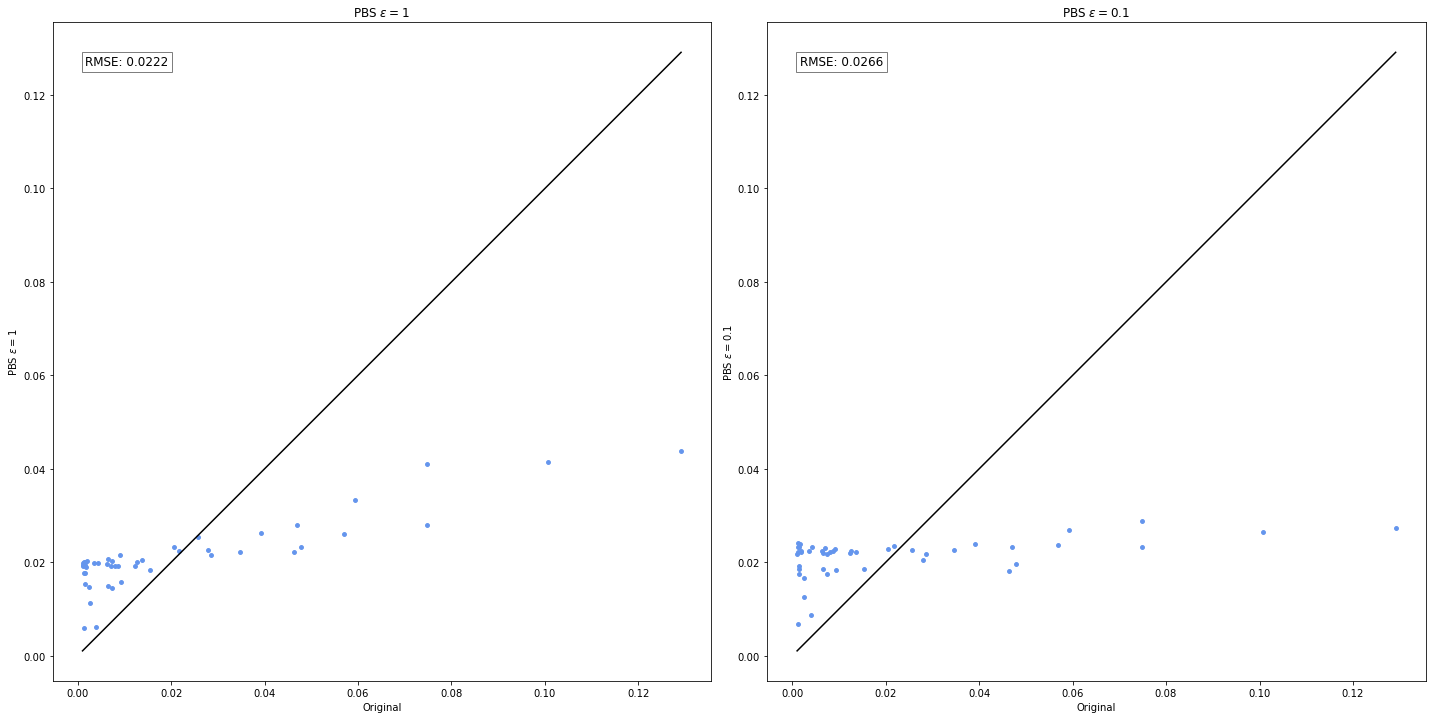

In [12]:
qe.m2_RMSE_treatment_occurrences(visual=True)

{'PBS $\\varepsilon=1$': 0.8681884734572436,
 'PBS $\\varepsilon=0.1$': 0.46645712193582467}

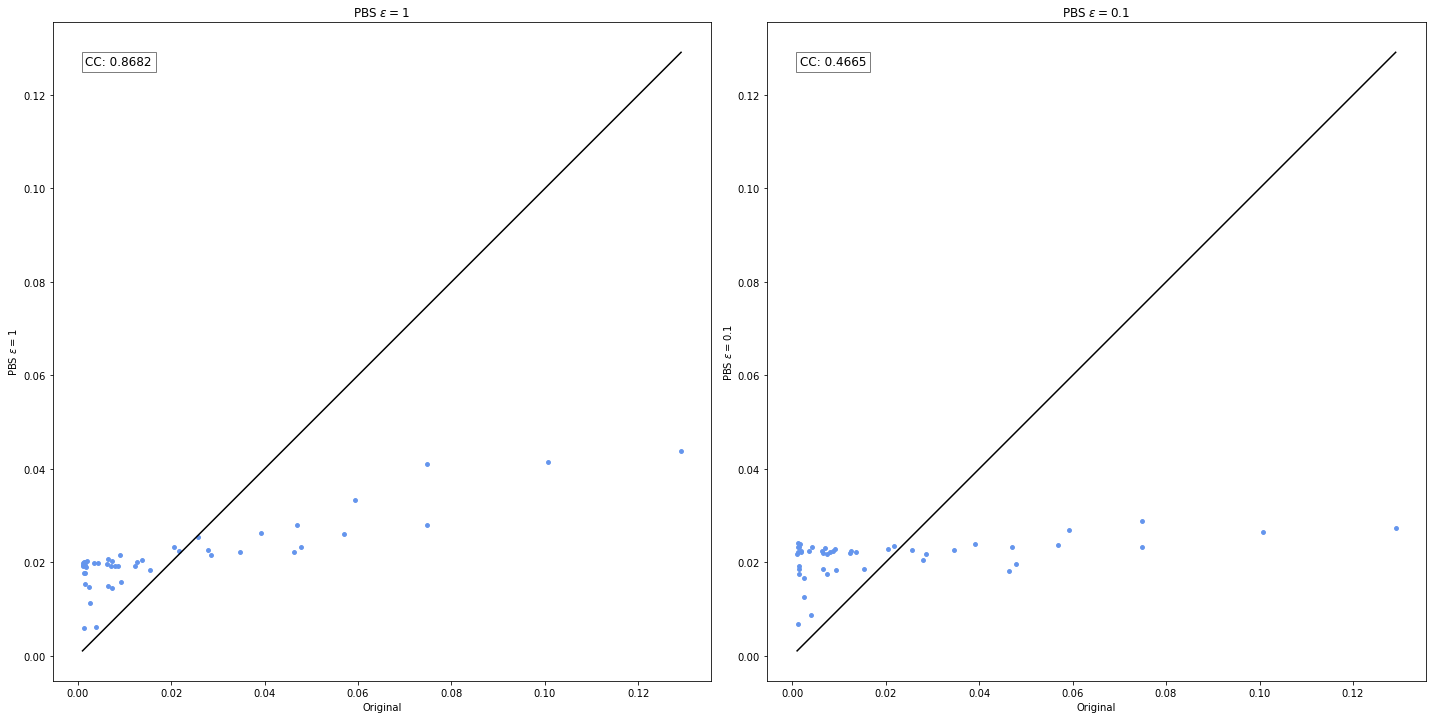

In [13]:
qe.m2_RMSE_treatment_occurrences(visual=True, metric='CC')

### Metric 3: Support Coverage treatments

In [14]:
qe.m3_SC_treatments()

{'PBS $\\varepsilon=1$': 1.0, 'PBS $\\varepsilon=0.1$': 1.0}

### Metric 4: JS distance sequence lengths

{'PBS $\\varepsilon=1$': 0.6019419679127458,
 'PBS $\\varepsilon=0.1$': 0.7181665143322072}

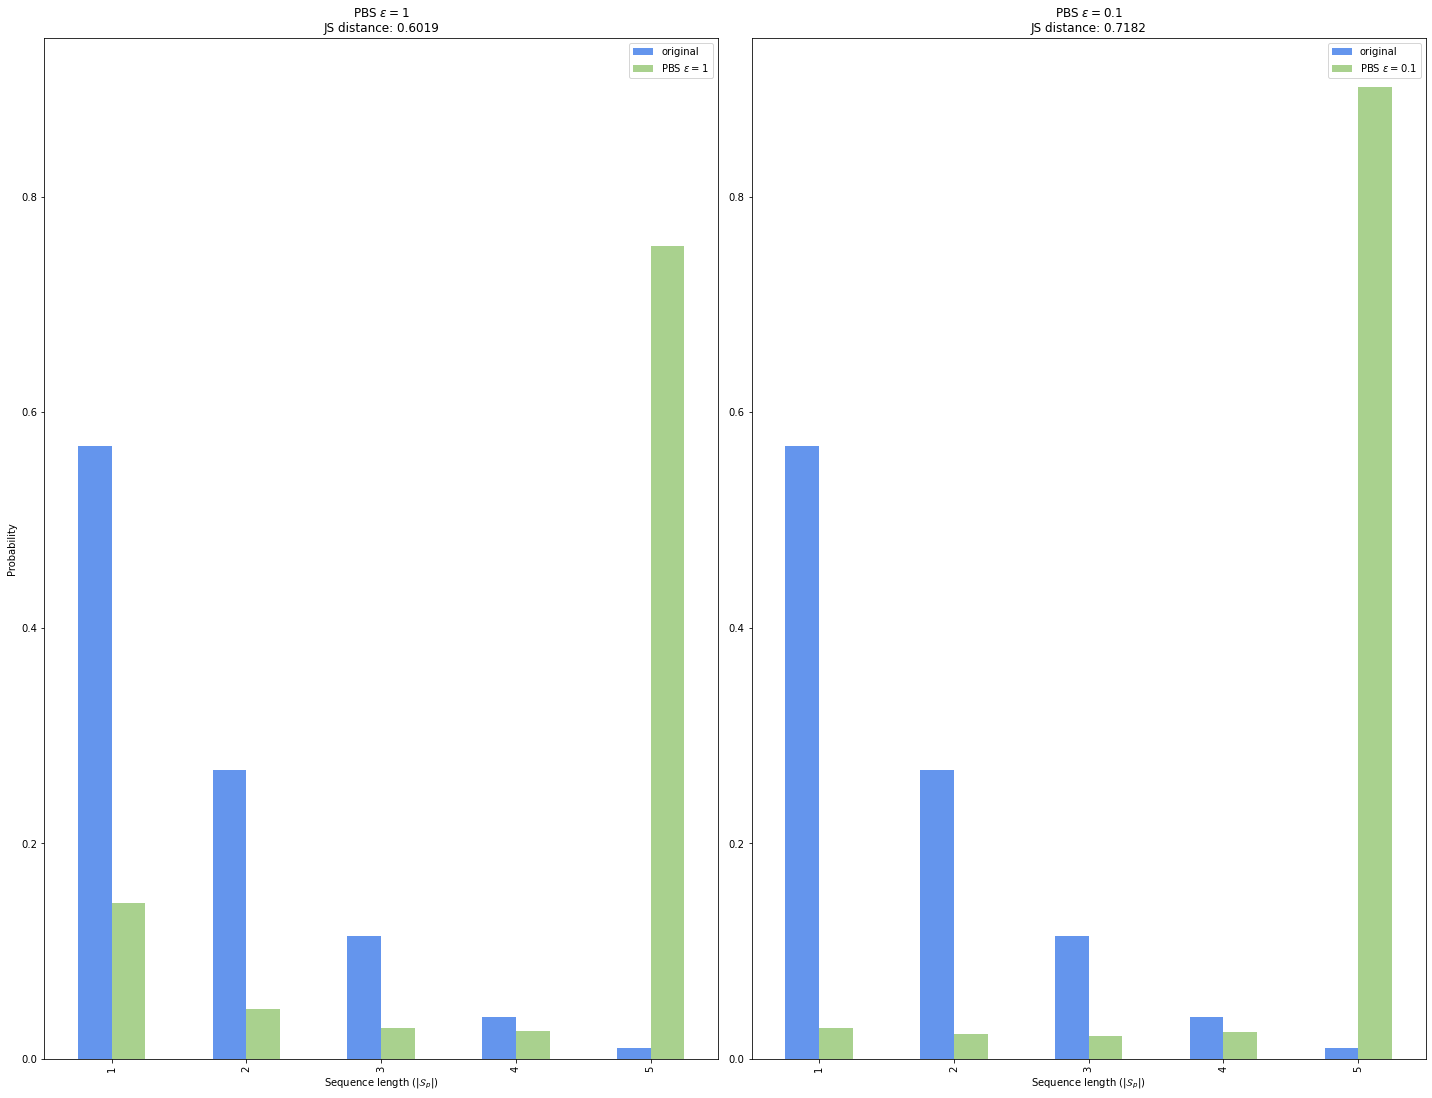

In [15]:
qe.m4_JSdistance_sequence_lengths(visual=True)

### Metric 5: Associations (PCD)

In [16]:
nominal_columns = list(set(original_static.columns) - set(['pat_geslacht_code', 'survival_1']))

In [17]:
nominal_columns = [feature_rename_dict[col] for col in nominal_columns]

{'PBS $\\varepsilon=1$': {'total': 2.7539039853040133,
  'static': 0.19539562218033413,
  'static_treatments': 1.6418510200659857,
  'treatments': 1.4678072649100258},
 'PBS $\\varepsilon=0.1$': {'total': 3.4672885719980227,
  'static': 0.4402034083039066,
  'static_treatments': 2.0720805751675715,
  'treatments': 1.8003541820575657}}

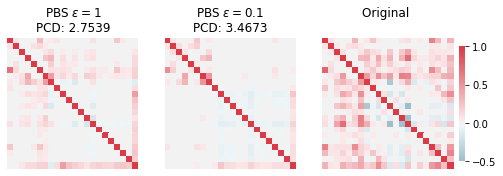

In [18]:
qe.m5_PCD(nominal_columns=nominal_columns, visual=True)

{'PBS $\\varepsilon=1$': {'total': 2.7539039853040133,
  'static': 0.19539562218033413,
  'static_treatments': 1.6418510200659857,
  'treatments': 1.4678072649100258},
 'PBS $\\varepsilon=0.1$': {'total': 3.4672885719980227,
  'static': 0.4402034083039066,
  'static_treatments': 2.0720805751675715,
  'treatments': 1.8003541820575657}}

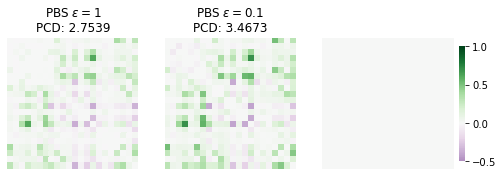

In [19]:
qe.m5_PCD(nominal_columns=nominal_columns, visual_difference=True)

### Metric 6: TB-TOH

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 14.4min finished


Finished training model on original train set
Finished training model on PBS $\varepsilon=1$
Finished training model on PBS $\varepsilon=0.1$


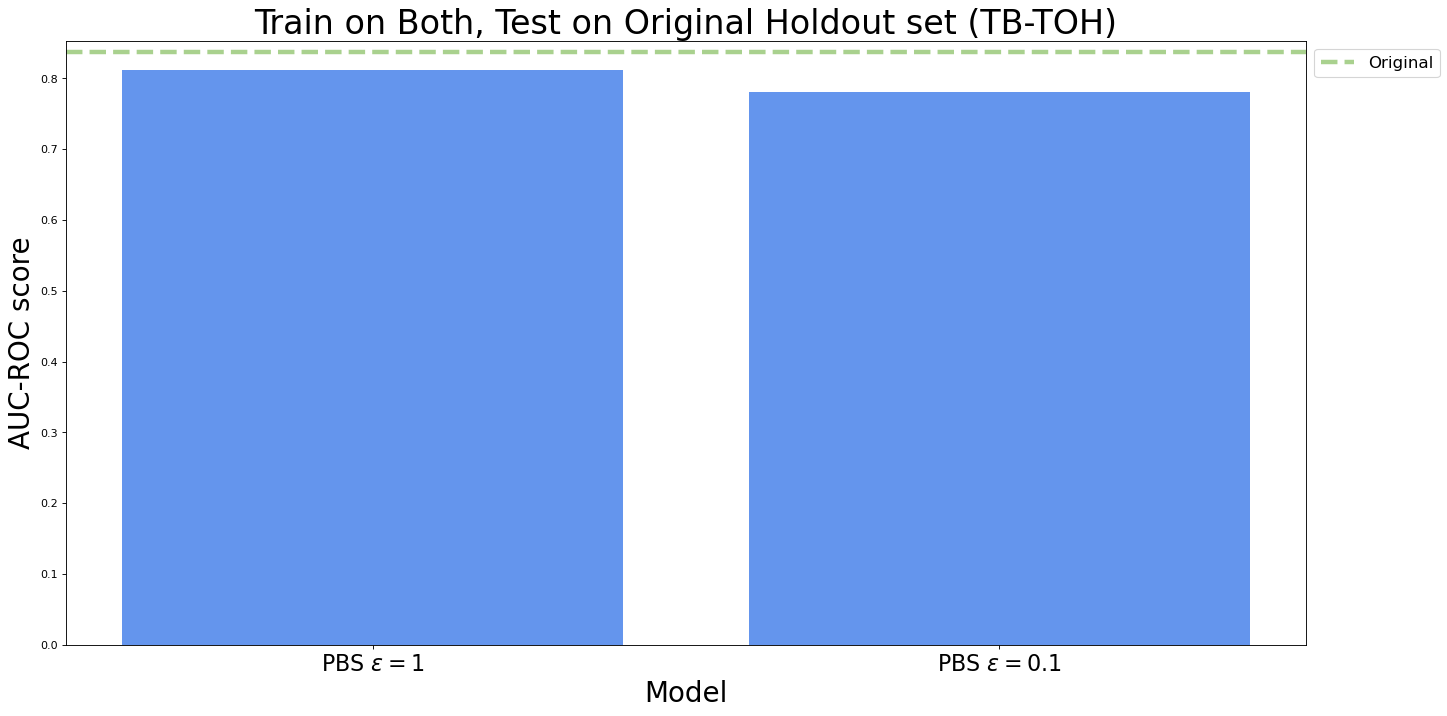

{'original': 0.8368029051156998,
 'PBS $\\varepsilon=1$': {'auc': 0.8124870407898768,
  'TB_TOH': 0.9709419456156633},
 'PBS $\\varepsilon=0.1$': {'auc': 0.7807146185624911,
  'TB_TOH': 0.9329731216152343}}

In [22]:
qe.m6_TBTOH(n_jobs=-1, visual=True)

### Metric 7: Jaccard similarity Sequential Pattern Mining 

In [24]:
SPM_PATH = '../../../../../AppData/Local/conda/conda/envs/synthetic-data/Lib/site-packages'

In [25]:
qe.m7_jaccardsimilarity_SPM(spmf_bin_location_dir=SPM_PATH)

Finished SPM original
Finished SPM PBS $\varepsilon=1$
Finished SPM PBS $\varepsilon=0.1$


{'original': {'# frequent sequential patterns': 51},
 'PBS $\\varepsilon=1$': {'# frequent sequential patterns': 34,
  'intersection size': 21,
  'union size': 64,
  'jaccard similarity': 0.328125},
 'PBS $\\varepsilon=0.1$': {'# frequent sequential patterns': 0,
  'intersection size': 0,
  'union size': 51,
  'jaccard similarity': 0}}

#### Robustness check

In [26]:
qe.m7_jaccardsimilarity_SPM(spmf_bin_location_dir=SPM_PATH,
                            support=0.02)

Finished SPM original
Finished SPM PBS $\varepsilon=1$
Finished SPM PBS $\varepsilon=0.1$


{'original': {'# frequent sequential patterns': 26},
 'PBS $\\varepsilon=1$': {'# frequent sequential patterns': 1,
  'intersection size': 1,
  'union size': 26,
  'jaccard similarity': 0.038461538461538464},
 'PBS $\\varepsilon=0.1$': {'# frequent sequential patterns': 0,
  'intersection size': 0,
  'union size': 26,
  'jaccard similarity': 0}}

In [27]:
qe.m7_jaccardsimilarity_SPM(spmf_bin_location_dir=SPM_PATH,
                            support=0.03)

Finished SPM original
Finished SPM PBS $\varepsilon=1$
Finished SPM PBS $\varepsilon=0.1$


{'original': {'# frequent sequential patterns': 13},
 'PBS $\\varepsilon=1$': {'# frequent sequential patterns': 0,
  'intersection size': 0,
  'union size': 13,
  'jaccard similarity': 0},
 'PBS $\\varepsilon=0.1$': {'# frequent sequential patterns': 0,
  'intersection size': 0,
  'union size': 13,
  'jaccard similarity': 0}}